In [628]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import boxcox
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [629]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [630]:
df = pd.read_csv('/content/drive/MyDrive/dataset/Klasifikasi Tingkat Kemiskinan di Indonesia.csv', sep=';')
df

,Provinsi,Kab/Kota,Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen),Rata-rata Lama Sekolah Penduduk 15+ (Tahun),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun),Indeks Pembangunan Manusia,Umur Harapan Hidup (Tahun),Persentase rumah tangga yang memiliki akses terhadap sanitasi layak,Persentase rumah tangga yang memiliki akses terhadap air minum layak,Tingkat Pengangguran Terbuka,Tingkat Partisipasi Angkatan Kerja,PDRB atas Dasar Harga Konstan menurut Pengeluaran (Rupiah),Klasifikasi Kemiskinan
0,ACEH,Simeulue,"18,98","9,48",7148.0,"66,41","65,28","71,56","87,45","5,71","71,15",1648096.0,0.0
1,ACEH,Aceh Singkil,"20,36","8,68",8776.0,"69,22","67,43","69,56","78,58","8,36","62,85",1780419.0,1.0
2,ACEH,Aceh Selatan,"13,18","8,88",8180.0,"67,44","64,4","62,55","79,65","6,46","60,85",4345784.0,0.0
3,ACEH,Aceh Tenggara,"13,41","9,67",8030.0,"69,44","68,22","62,71","86,71","6,43","69,62",3487157.0,0.0
4,ACEH,Aceh Timur,"14,45","8,21",8577.0,"67,83","68,74","66,75","83,16","7,13","59,48",8433526.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##Exploratory Data Analysis (EDA)

In [631]:
df.isnull().sum()

,0
Provinsi,485
Kab/Kota,485
Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen),485
Rata-rata Lama Sekolah Penduduk 15+ (Tahun),485
Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun),485
Indeks Pembangunan Manusia,485
Umur Harapan Hidup (Tahun),485
Persentase rumah tangga yang memiliki akses terhadap sanitasi layak,485
Persentase rumah tangga yang memiliki akses terhadap air minum layak,485
Tingkat Pengangguran Terbuka,485


In [632]:
df.dropna(inplace=True)

In [633]:
df.nunique()

,0
Provinsi,34
Kab/Kota,514
Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen),452
Rata-rata Lama Sekolah Penduduk 15+ (Tahun),377
Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun),498
Indeks Pembangunan Manusia,452
Umur Harapan Hidup (Tahun),411
Persentase rumah tangga yang memiliki akses terhadap sanitasi layak,487
Persentase rumah tangga yang memiliki akses terhadap air minum layak,465
Tingkat Pengangguran Terbuka,373


In [634]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 514 entries, 0 to 513
Data columns (total 13 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Provinsi                                                              514 non-null    object 
 1   Kab/Kota                                                              514 non-null    object 
 2   Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)       514 non-null    object 
 3   Rata-rata Lama Sekolah Penduduk 15+ (Tahun)                           514 non-null    object 
 4   Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)          514 non-null    float64
 5   Indeks Pembangunan Manusia                                            514 non-null    object 
 6   Umur Harapan Hidup (Tahun)                                            514 non-null    object 
 7   Pers

In [635]:
df.describe()

,Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun),PDRB atas Dasar Harga Konstan menurut Pengeluaran (Rupiah),Klasifikasi Kemiskinan
count,514.000000,5.140000e+02,514.000000
mean,10324.787938,2.196408e+07,0.120623
std,2717.144186,4.790492e+07,0.326005
min,3976.000000,1.474850e+05,0.000000
25%,8574.000000,3.654292e+06,0.000000
50%,10196.500000,8.814926e+06,0.000000
75%,11719.000000,1.973510e+07,0.000000
max,23888.000000,4.600810e+08,1.000000


In [636]:
df.duplicated().sum()

0

In [637]:
df = df.drop_duplicates()

array([[<Axes: title={'center': 'Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)'}>,
        <Axes: title={'center': 'PDRB atas Dasar Harga Konstan menurut Pengeluaran (Rupiah)'}>],
       [<Axes: title={'center': 'Klasifikasi Kemiskinan'}>, <Axes: >]],
      dtype=object)

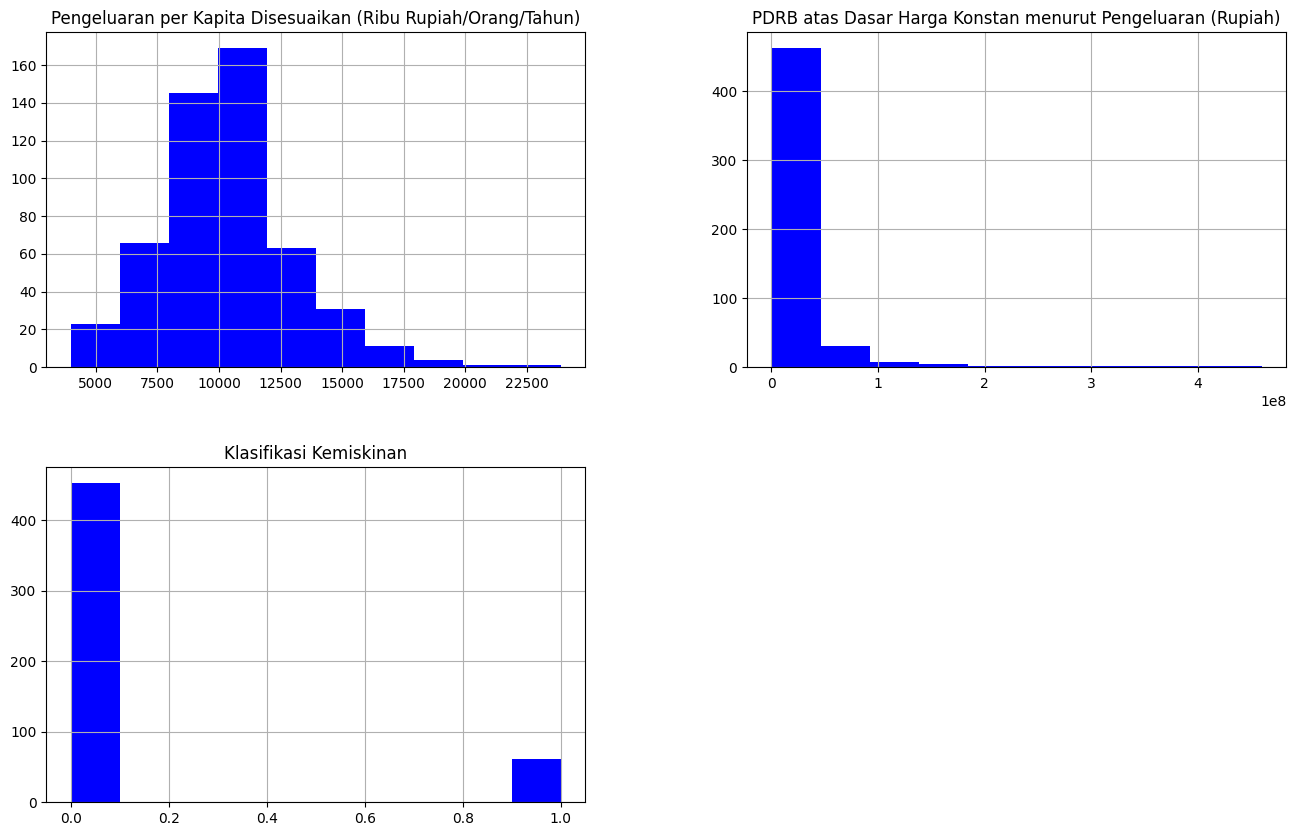

In [638]:
df.hist(figsize=(16,10), color='blue')

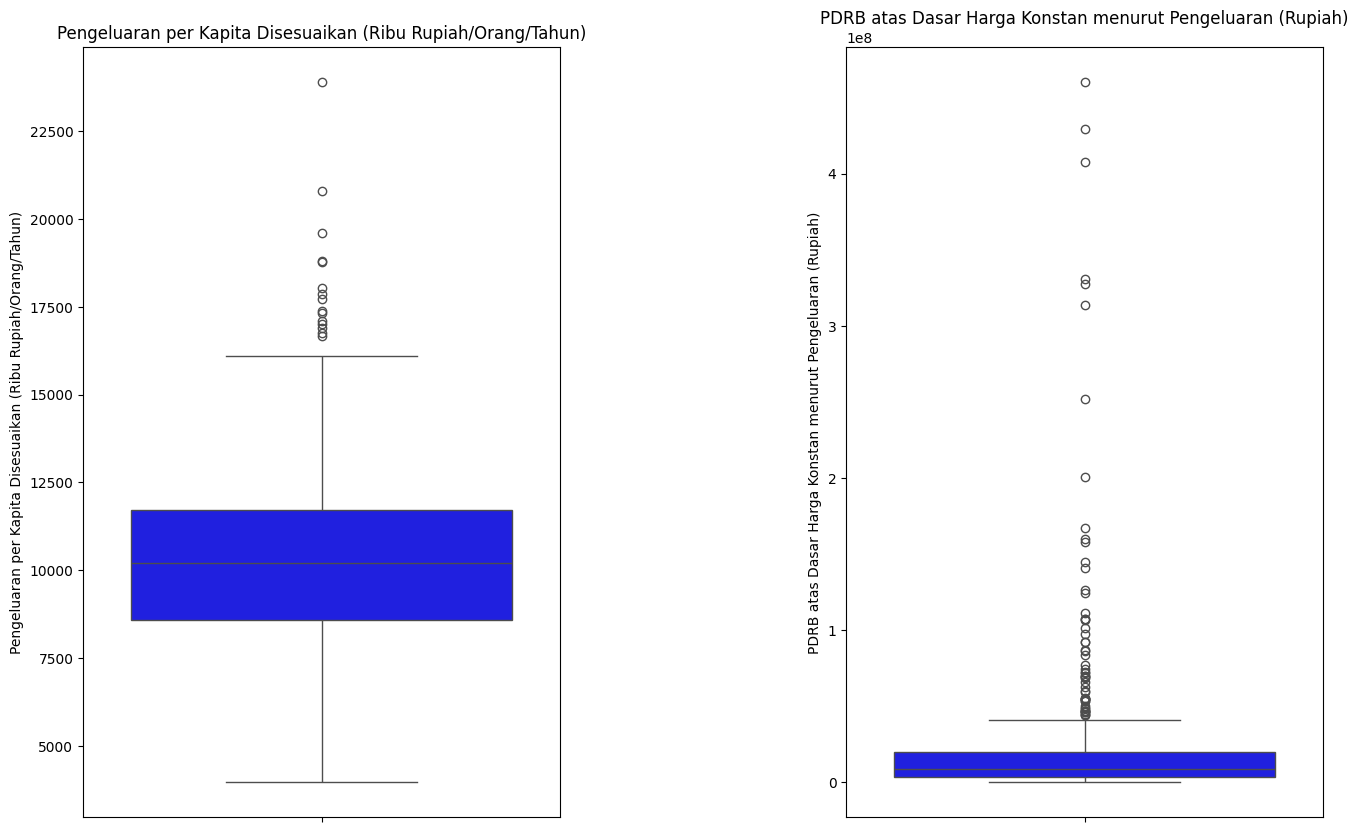

In [639]:
def boxplot(df):
  var = ['Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)', 'PDRB atas Dasar Harga Konstan menurut Pengeluaran (Rupiah)']
  fig, ax = plt.subplots(1, 2, figsize=(16,10))
  fig.subplots_adjust(hspace=0.6, wspace=0.6)

  for i, var in enumerate(var):
    sns.boxplot(y=var, data=df, color='blue', ax=ax[i])
    ax[i].set_title(var)
    ax[i].set_ylabel(var, rotation=90)
  plt.show()

boxplot(df)

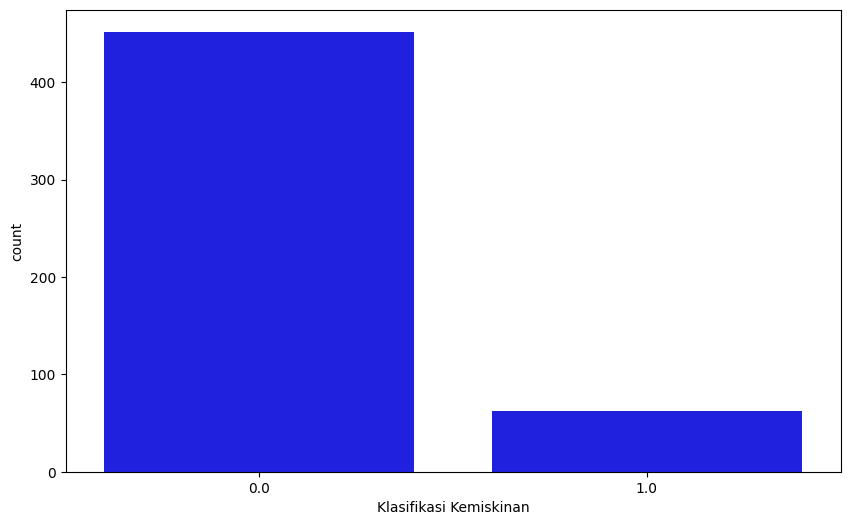

In [640]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['Klasifikasi Kemiskinan'], color='blue')
plt.show()

##Data Pre-processing

In [641]:
df['Klasifikasi Kemiskinan'] = df['Klasifikasi Kemiskinan'].astype(int)

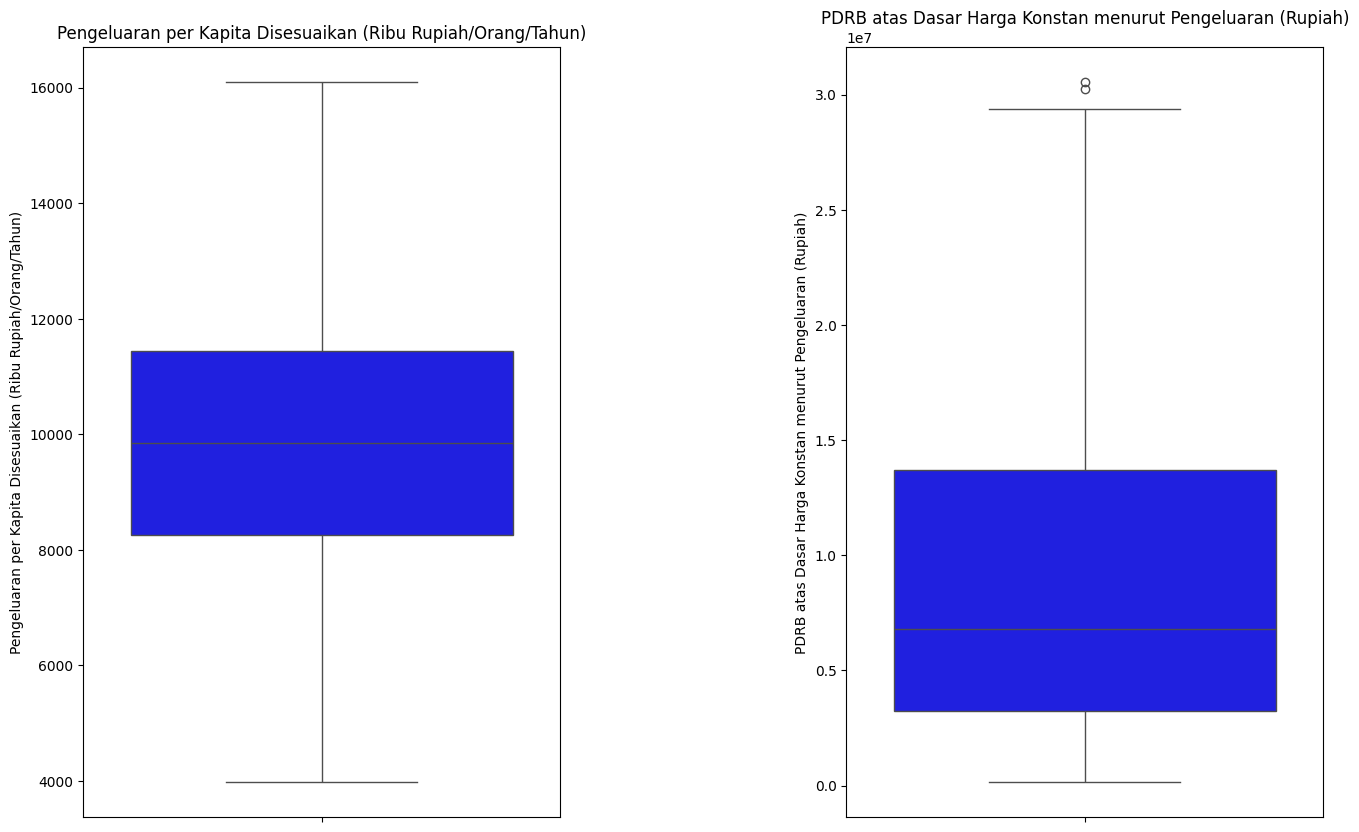

In [642]:
def remove_outliers_iqr(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  return df_filtered


for i in range(2):
  df = remove_outliers_iqr(df, 'Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)')
  df = remove_outliers_iqr(df, 'PDRB atas Dasar Harga Konstan menurut Pengeluaran (Rupiah)')
boxplot(df)

In [643]:
x = df.drop(columns='Klasifikasi Kemiskinan')
y = df['Klasifikasi Kemiskinan']

In [644]:
le = LabelEncoder()
for var in x.select_dtypes(include=['object']).columns:
    x[var] = le.fit_transform(x[var])

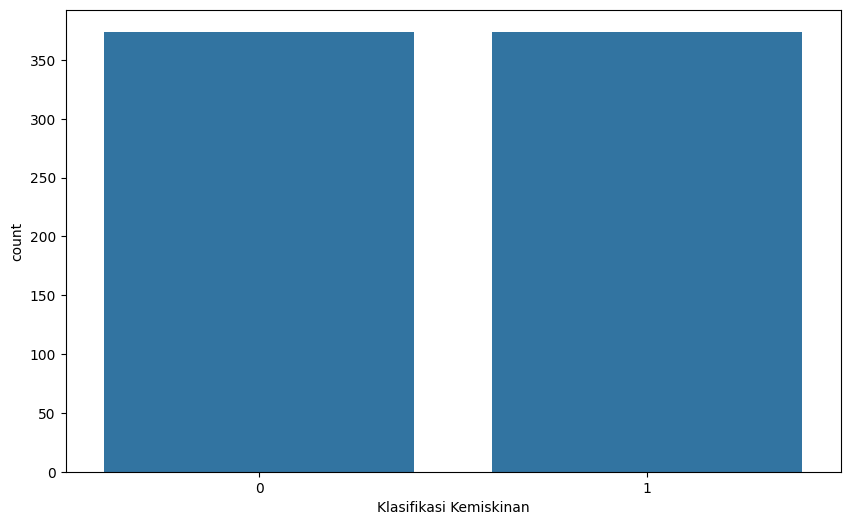

In [645]:
fig = plt.figure(figsize=(10,6))
sm = SMOTE()
x, y = sm.fit_resample(x, y)
sns.countplot(x=y)
plt.show()

In [646]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [647]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

Text(0, 0.5, 'Error Rate')

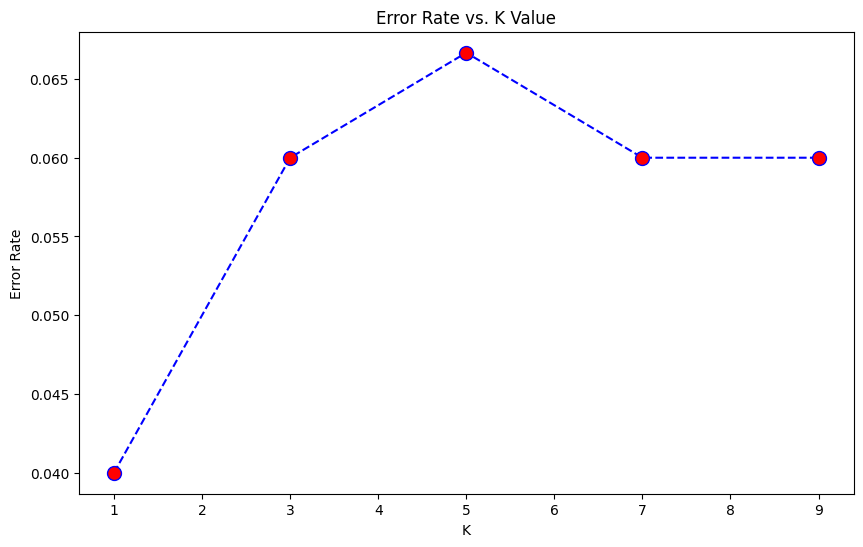

In [648]:
error_rate = []

for i in range(1, 10):
  if i % 2 != 0:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1, 10, 2) , error_rate ,color="blue", linestyle="dashed", marker="o",
         markerfacecolor="red", markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")

In [649]:
print(f"x train = {x_train.shape} \nx_test = {x_test.shape}")

x train = (598, 12) 
x_test = (150, 12)


In [653]:
leaf_size = [10, 20, 30, 40, 50]
p_arr = [1, 2]
neighbor = [3, 5, 7, 9, 11]

best_accuracy = 0
best_params = {}
for leaf in leaf_size:
    for n in neighbor:
        for p in p_arr:
            knn = KNeighborsClassifier(n_neighbors=n, leaf_size=leaf, p=p)
            knn.fit(x_train, y_train)
            y_pred = knn.predict(x_test)
            accuracy = accuracy_score(y_test, y_pred)
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {
                    'leaf_size': leaf,
                    'n_neighbors': n,
                    'p': p
                }

print(f"Accuracy: {best_accuracy:.4f}")
print(f"Parameters: {best_params}")

Accuracy: 0.9400
Parameters: {'leaf_size': 10, 'n_neighbors': 3, 'p': 1}


In [650]:
knn = KNeighborsClassifier(n_neighbors=3, leaf_size=10, p=1)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        81
           1       0.88      1.00      0.94        69

    accuracy                           0.94       150
   macro avg       0.94      0.94      0.94       150
weighted avg       0.95      0.94      0.94       150



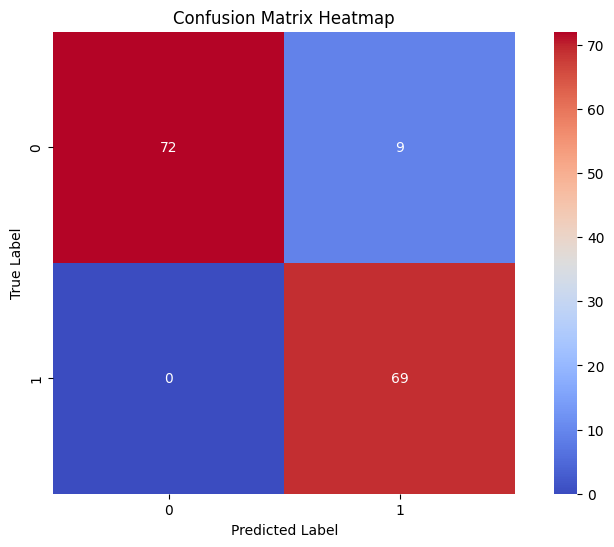

In [652]:
plt.figure(figsize=(10,6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="coolwarm", square=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()